### This notebook visualizes a csv result of tfr_evaluate.py

In [4]:
import numpy as np
import pandas as pd
import os
import scipy.stats 
import h5py
import loss
from tensorflow.python.keras import backend as K
from modelzoo import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
import tfr_evaluate
import glob

In [44]:
performance_results = pd.read_csv('/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/model_evaluations/32_res.csv')
eval_type = 'whole'
pred_type = 'raw'

raw_perf = performance_results[(performance_results['pred type']==pred_type)]



In [51]:
res_dense_32 = raw_perf[raw_perf['run_dir']=='paper_runs/new_models/32_res/run-20211023_095131-w6okxt01'][['targets', 'pr_corr', 'eval type']]

In [61]:
res_dense_32[res_dense_32['eval type']=='whole'].merge(res_dense_32[res_dense_32['eval type']=='idr'],
                                                      on='targets', suffixes=['_whole', '_idr']).sort_values('pr_corr_whole')

,targets,pr_corr_whole,eval type_whole,pr_corr_idr,eval type_idr
4,HG03575,0.520921,whole,0.840606,idr
6,DND-41,0.616018,whole,0.862164,idr
13,PC-3,0.629678,whole,0.843054,idr
12,Panc1,0.636258,whole,0.848076,idr
0,GM21381,0.650973,whole,0.854604,idr
10,IMR-90,0.655147,whole,0.852992,idr
11,NCI-H929,0.667417,whole,0.821787,idr
14,MCF,0.670849,whole,0.846820,idr
9,HCT116,0.687823,whole,0.869730,idr
7,GM12878,0.688220,whole,0.844328,idr


In [33]:
# performance_results = pd.read_csv('/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/model_evaluations/augmentation_48.csv')
# eval_type = 'whole'
# pred_type = 'raw'
# labels = ['BPNet base resolution', 'BPNet 128 resolution']
# for b, bin_size_filter in enumerate([1, 128]):
#     raw_whole_perf = performance_results[(performance_results['eval type']==eval_type)&
#                                         (performance_results['pred type']==pred_type)&
#                                         (performance_results['bin_size']==bin_size_filter)]


#     descriptions = raw_whole_perf.iloc[:,7:]
#     avg_perf = raw_whole_perf.groupby('run_dir').mean().reset_index()
#     avg_perf_complete = avg_perf.merge(descriptions, how='left', left_on='run_dir',right_on='run_dir').drop_duplicates(subset='run_dir')
#     avg_perf_complete['dataset'] = ['peak centered' if 'peak' in d else 'random chop' for d in avg_perf_complete.data_dir]
#     df = avg_perf_complete[['model_fn', 'pr_corr', 'mse', 'crop', 'rev_comp_x','bin_size_x', 'dataset']].sort_values('model_fn')
# #     print(df.sort_values('pr_corr'))

#     table_entries[labels[b]] = df.iloc[np.argmax(df['pr_corr']),:]['pr_corr']


In [18]:
table_entries = {'base resolution':{}, '32 bin resolution':{}}
performance_results = pd.read_csv('/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/model_evaluations/binloss_basenji.csv')
eval_type = 'whole'
pred_type = 'raw'
keys = ['base resolution', '32 bin resolution']
for b, bin_size_filter in enumerate([1, 32]):
    raw_whole_perf = performance_results[(performance_results['eval type']==eval_type)&
                                        (performance_results['pred type']==pred_type)&
                                        (performance_results['bin_size']==bin_size_filter)]


    descriptions = raw_whole_perf.iloc[:,7:]
    avg_perf = raw_whole_perf.groupby('run_dir').mean().reset_index()
    avg_perf_complete = avg_perf.merge(descriptions, how='left', left_on='run_dir',right_on='run_dir').drop_duplicates(subset='run_dir')
    avg_perf_complete['dataset'] = ['peak centered' if 'peak' in d else 'random chop' for d in avg_perf_complete.data_dir]
    df = avg_perf_complete[['model_fn', 'pr_corr', 'mse','bin_size_x', 'dataset']].sort_values('model_fn')
#     print(df.sort_values('pr_corr'))

    table_entries[keys[b]]['basenji'] = df.iloc[np.argmax(df['pr_corr']),:]['pr_corr']

In [27]:
avg_perf_complete[['model_fn', 'pr_corr', 'mse','bin_size_x', 'dataset', 'loss_fn', 'run_dir']].sort_values('model_fn').iloc[0, -1]

'paper_runs/basenji/binloss_basenji/run-20210920_034449-8p51o3ho'

In [19]:
table_entries

{'base resolution': {'basenji': 0.576752792012535},
 '32 bin resolution': {'basenji': 0.5844644671113414}}

In [15]:
'/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/model_evaluations/'

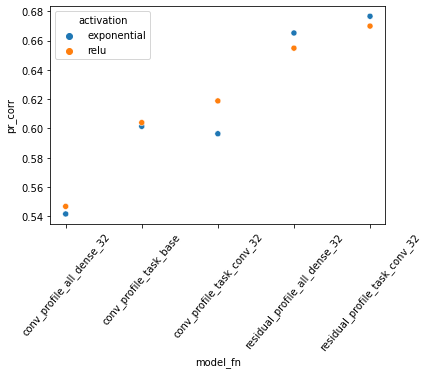

In [16]:
performance_results = pd.read_csv('/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/model_evaluations/32_res.csv')
eval_type = 'whole'
pred_type = 'raw'

raw_whole_perf = performance_results[(performance_results['eval type']==eval_type)&
                                    (performance_results['pred type']==pred_type)]

descriptions = raw_whole_perf.iloc[:,7:]
avg_perf = raw_whole_perf.groupby('run_dir').mean().reset_index()
avg_perf_complete = avg_perf.merge(descriptions, how='left', left_on='run_dir',right_on='run_dir').drop_duplicates(subset='run_dir')

sns.scatterplot(data=avg_perf_complete[['activation', 'model_fn', 'pr_corr', 'mse']].sort_values('model_fn'),
               x='model_fn', y='pr_corr', hue='activation')

plt.xticks(rotation=50);

    

In [11]:
avg_perf_complete[(avg_perf_complete['model_fn']=='residual_profile_all_dense_32')&
                 (avg_perf_complete['activation']=='exponential')]['run_dir'].values[0]

'paper_runs/new_models/32_res/run-20211023_095131-w6okxt01'

In [17]:
avg_perf_complete[(avg_perf_complete['model_fn']=='conv_profile_all_dense_32')&
                 (avg_perf_complete['activation']=='relu')]['run_dir'].values[0]

'paper_runs/new_models/32_res/run-20211023_095137-ixzgndsj'

In [71]:

for i, row in avg_perf_complete.iterrows():
    model_id = row['activation'] + ' ' + row['model_fn']
    table_entries['32 bin resolution'][model_id] = row['pr_corr']

In [72]:
table_entries

{'base resolution': {'basenji': 0.576752792012535},
 '32 bin resolution': {'basenji': 0.5844644671113414,
  'exponential conv_profile_all_dense_32': 0.541614600254761,
  'exponential residual_profile_all_dense_32': 0.6652094107558179,
  'exponential conv_profile_task_conv_32': 0.596397192270947,
  'exponential residual_profile_task_conv_32': 0.6766135122551591,
  'exponential conv_profile_task_base': 0.6014398237790821,
  'relu residual_profile_all_dense_32': 0.6548470177869479,
  'relu residual_profile_task_conv_32': 0.6699191411059828,
  'relu conv_profile_all_dense_32': 0.5467686305394831,
  'relu conv_profile_task_conv_32': 0.6188213309098523,
  'relu conv_profile_task_base': 0.6040166796144629}}

In [38]:
avg_perf_complete[(avg_perf_complete['model_fn']=='residual_profile_all_dense_32')&
                 (avg_perf_complete['activation']=='exponential')]['run_dir'].values

array(['paper_runs/new_models/32_res/run-20211023_095131-w6okxt01'],
      dtype=object)

In [39]:
avg_perf_complete.sort_values('pr_corr').iloc[[-1]][['run_dir', 'model_fn', 'bin_size_y', 'activation', 'pr_corr']].to_csv('best_overall_32.csv')

In [23]:
(avg_perf_complete[avg_perf_complete['model_fn']=='residual_profile_task_conv_32'][['run_dir', 'model_fn', 'bin_size_y', 'activation', 'pr_corr']]).to_csv('32_best.csv')

In [11]:
avg_perf_complete[avg_perf_complete['model_fn']=='residual_profile_task_conv_32']['run_dir'].values

array(['paper_runs/new_models/32_res/run-20211023_095136-to28llil',
       'paper_runs/new_models/32_res/run-20211023_095137-8shfejto'],
      dtype=object)

     activation                    model_fn   pr_corr       mse
0   exponential      conv_profile_task_base  0.598819  0.678551
45         relu      conv_profile_task_base  0.607010  0.657293
30  exponential   residual_profile_all_base  0.655211  0.587083
75         relu   residual_profile_all_base  0.642450  0.607203
15  exponential  residual_profile_task_base  0.653638  0.590186
60         relu  residual_profile_task_base  0.636879  0.622225


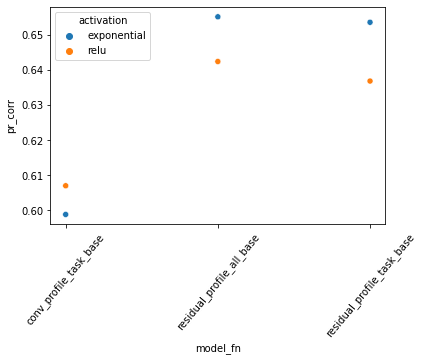

In [73]:
fin_runs = tfr_evaluate.collect_run_dirs('NEW_MODELS_BASERES')
performance_results = pd.concat([pd.read_csv(p) for p in 
                       glob.glob('/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/model_evaluations/*base_res.csv')])
performance_results = performance_results[performance_results['run_dir'].isin(fin_runs)]
eval_type = 'whole'
pred_type = 'raw'

raw_whole_perf = performance_results[(performance_results['eval type']==eval_type)&
                                    (performance_results['pred type']==pred_type)]

descriptions = raw_whole_perf.iloc[:,7:]
avg_perf = raw_whole_perf.groupby('run_dir').mean().reset_index()
avg_perf_complete = avg_perf.merge(descriptions, how='left', left_on='run_dir',right_on='run_dir').drop_duplicates(subset='run_dir')

df = avg_perf_complete[['activation', 'model_fn', 'pr_corr', 'mse']].sort_values('model_fn')
sns.scatterplot(data=df,
               x='model_fn', y='pr_corr', hue='activation')

plt.xticks(rotation=50);
print(df)


In [74]:
for i, row in avg_perf_complete.iterrows():
    model_id = row['activation'] + ' ' + row['model_fn']
    table_entries['base resolution'][model_id] = row['pr_corr']

In [75]:
table_entries['base resolution']

{'basenji': 0.576752792012535,
 'exponential conv_profile_task_base': 0.5988185154356553,
 'exponential residual_profile_task_base': 0.6536380468259895,
 'exponential residual_profile_all_base': 0.6552114975516662,
 'relu conv_profile_task_base': 0.6070096232525592,
 'relu residual_profile_task_base': 0.6368785223129263,
 'relu residual_profile_all_base': 0.64245040866167}

In [80]:
pd.DataFrame.from_dict(table_entries['base resolution'], orient='index', columns=['base resolution performance']).sort_values('base resolution performance')

,base resolution performance
basenji,0.576753
exponential conv_profile_task_base,0.598819
relu conv_profile_task_base,0.607010
relu residual_profile_task_base,0.636879
relu residual_profile_all_base,0.642450
exponential residual_profile_task_base,0.653638
exponential residual_profile_all_base,0.655211


In [82]:
pd.DataFrame.from_dict(table_entries['32 bin resolution'], orient='index', columns=['32 bin performance']).sort_values('32 bin performance')

,32 bin performance
exponential conv_profile_all_dense_32,0.541615
relu conv_profile_all_dense_32,0.546769
basenji,0.584464
exponential conv_profile_task_conv_32,0.596397
exponential conv_profile_task_base,0.601440
relu conv_profile_task_base,0.604017
relu conv_profile_task_conv_32,0.618821
relu residual_profile_all_dense_32,0.654847
exponential residual_profile_all_dense_32,0.665209
relu residual_profile_task_conv_32,0.669919


In [83]:
(0.676614 - 0.584464)/0.584464

0.1576658271510308

In [42]:
avg_perf_complete.sort_values('pr_corr').iloc[[-1]][['run_dir', 'model_fn', 'bin_size_y', 'activation', 'pr_corr']].to_csv('best_overall_base.csv')

In [25]:
(avg_perf_complete[avg_perf_complete['model_fn']=='residual_profile_all_base'][['run_dir', 'model_fn', 'bin_size_y', 'activation', 'pr_corr']]).to_csv('base_best.csv')

In [45]:
avg_perf_complete[['model_fn', 'activation', 'run_dir']]

,model_fn,activation,run_dir
0,conv_profile_task_base,exponential,paper_runs/new_models/base_res/run-20211022_14...
15,residual_profile_task_base,exponential,paper_runs/new_models/base_res/run-20211022_14...
30,residual_profile_all_base,exponential,paper_runs/new_models/base_res/run-20211022_14...
45,conv_profile_task_base,relu,paper_runs/new_models/base_res/run-20211022_15...
60,residual_profile_task_base,relu,paper_runs/new_models/base_res/run-20211022_20...
75,residual_profile_all_base,relu,paper_runs/new_models/base_res/run-20211022_22...


In [55]:
avg_perf_complete[(avg_perf_complete['model_fn']=='residual_profile_task_base')&
                 (avg_perf_complete['activation']=='exponential')]['run_dir'].values

array(['paper_runs/new_models/base_res/run-20211022_140424-yc4sh7qf'],
      dtype=object)

     bin_size_x  loss_fn   pr_corr
0            32  poisson  0.584464
90           64  poisson  0.618963
135         128  poisson  0.635478
225         512  poisson  0.658232
300        1024  poisson  0.665857
375        2048  poisson  0.656958
450           1  poisson  0.576753
525         256  poisson  0.647689


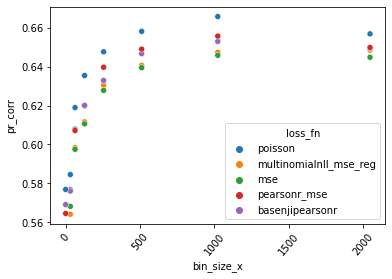

In [14]:
fin_runs = tfr_evaluate.collect_run_dirs('BASENJI_BIN_LOSS')
performance_results = pd.concat([pd.read_csv(p) for p in 
                       glob.glob('/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/model_evaluations/*binloss_basenji.csv')])
performance_results = performance_results[performance_results['run_dir'].isin(fin_runs)]
eval_type = 'whole'
pred_type = 'raw'

raw_whole_perf = performance_results[(performance_results['eval type']==eval_type)&
                                    (performance_results['pred type']==pred_type)]

descriptions = raw_whole_perf.iloc[:,7:]
avg_perf = raw_whole_perf.groupby('run_dir').mean().reset_index()
avg_perf_complete = avg_perf.merge(descriptions, how='left', left_on='run_dir',right_on='run_dir').drop_duplicates(subset='run_dir')

df = avg_perf_complete[['bin_size_x', 'loss_fn', 'pr_corr']]#.sort_values('model_fn')
sns.scatterplot(data=df,
               x='bin_size_x', y='pr_corr', hue='loss_fn')

plt.xticks(rotation=50);
print(df[df['loss_fn']=='poisson'])

In [18]:
avg_perf_complete[(avg_perf_complete['loss_fn']=='poisson')&(avg_perf_complete['bin_size_x']==256)]['run_dir'].values


array(['paper_runs/basenji/binloss_basenji/run-20210923_162932-56p3xy2p'],
      dtype=object)

     bin_size_x  loss_fn   pr_corr
30           32  poisson  0.583022
45            1  poisson  0.600829
165          64  poisson  0.588261
240         128  poisson  0.590842
285         256  poisson  0.594431
360         512  poisson  0.592138
435        1024  poisson  0.572238
510        2048  poisson  0.524071


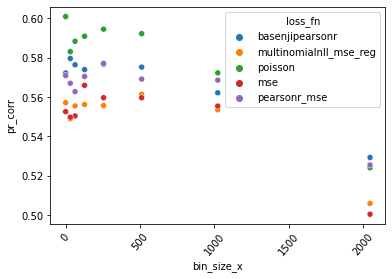

In [19]:
# fin_runs = tfr_evaluate.collect_run_dirs('BASENJI_BIN_LOSS')
performance_results = pd.concat([pd.read_csv(p) for p in 
                       glob.glob('/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/model_evaluations/*bin_loss_40.csv')])
# performance_results = performance_results[performance_results['run_dir'].isin(fin_runs)]
eval_type = 'whole'
pred_type = 'raw'

raw_whole_perf = performance_results[(performance_results['eval type']==eval_type)&
                                    (performance_results['pred type']==pred_type)]

descriptions = raw_whole_perf.iloc[:,7:]
avg_perf = raw_whole_perf.groupby('run_dir').mean().reset_index()
avg_perf_complete = avg_perf.merge(descriptions, how='left', left_on='run_dir',right_on='run_dir').drop_duplicates(subset='run_dir')

df = avg_perf_complete[['bin_size_x', 'loss_fn', 'pr_corr']]#.sort_values('model_fn')
sns.scatterplot(data=df,
               x='bin_size_x', y='pr_corr', hue='loss_fn')

plt.xticks(rotation=50);
print(df[df['loss_fn']=='poisson'])

In [20]:
avg_perf_complete[(avg_perf_complete['loss_fn']=='poisson')&(avg_perf_complete['bin_size_x']==1)]['run_dir'].values



array(['paper_runs/bpnet/bin_loss_40/run-20211013_133014-ku9mdrht'],
      dtype=object)